## Scraping and Importing Data

In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='2ac0dc42-06d8-4a89-b570-b123619b54fa', project_access_token='p-1ca9f3e74ad0dd82be33d48fd7d81a8a57059542')
pc = project.project_context


In [2]:
import pandas as pd
df=pd.read_html("https://www.makaan.com/price-trends")
df=df[0]

In [3]:
df.head()

City Name    Rental Rates                                      \
  Unnamed: 0_level_1           1 BHk                     2 BHK             
  Unnamed: 0_level_2      Rent range  Avg rent      Rent range  Avg rent   
0          Ahmedabad  5,500 - 25,000  11631.58  7,500 - 75,000  19566.09   
1          Bangalore   2,500 - 1.6 L  12691.02   4,400 - 1.9 L  19688.55   
2            Chennai  2,500 - 50,000   9469.39     5,000 - 1 L  15760.46   
3              Delhi   3,200 - 1.5 L  12425.47   3,000 - 1.5 L  19357.13   
4          Ghaziabad  3,000 - 25,000   9329.03  5,000 - 30,000  12285.71   

                             
            3 BHK            
       Rent range  Avg rent  
0  10,000 - 1.3 L  31308.69  
1    10,000 - 9 L   41341.3  
2   8,500 - 1.8 L  36254.73  
3   7,000 - 3.2 L  47127.06  
4  8,500 - 26,000   15137.5

In [4]:
df.columns=df.columns.droplevel()

In [5]:
df.columns=['City','1bhk_rent_range','1bhk_avg_rent','2bhk_rent_range','2bhk_avg_rent','3bhk_rent_range','3bhk_avg_rent']

In [6]:
df.head()

,City,1bhk_rent_range,1bhk_avg_rent,2bhk_rent_range,2bhk_avg_rent,3bhk_rent_range,3bhk_avg_rent
0,Ahmedabad,"5,500 - 25,000",11631.58,"7,500 - 75,000",19566.09,"10,000 - 1.3 L",31308.69
1,Bangalore,"2,500 - 1.6 L",12691.02,"4,400 - 1.9 L",19688.55,"10,000 - 9 L",41341.3
2,Chennai,"2,500 - 50,000",9469.39,"5,000 - 1 L",15760.46,"8,500 - 1.8 L",36254.73
3,Delhi,"3,200 - 1.5 L",12425.47,"3,000 - 1.5 L",19357.13,"7,000 - 3.2 L",47127.06
4,Ghaziabad,"3,000 - 25,000",9329.03,"5,000 - 30,000",12285.71,"8,500 - 26,000",15137.5


In [7]:
df.shape

(376, 7)

In [8]:
df.drop(columns=['1bhk_rent_range','2bhk_rent_range','3bhk_rent_range'],axis=1,inplace=True)
df.head()

,City,1bhk_avg_rent,2bhk_avg_rent,3bhk_avg_rent
0,Ahmedabad,11631.58,19566.09,31308.69
1,Bangalore,12691.02,19688.55,41341.3
2,Chennai,9469.39,15760.46,36254.73
3,Delhi,12425.47,19357.13,47127.06
4,Ghaziabad,9329.03,12285.71,15137.5


### Our Dataframe now has 107 cities

In [9]:
import numpy as np
df = df[df['1bhk_avg_rent'] != "-"]
df = df[df['2bhk_avg_rent'] != "-"]
df = df[df['3bhk_avg_rent'] != "-"]
df.shape

(107, 4)

In [10]:
!pip install geopy


In [11]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="gfhbj")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['City'].apply(geocode)

df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [12]:
df.drop(columns=['location'],inplace=True)
df.head()

,City,1bhk_avg_rent,2bhk_avg_rent,3bhk_avg_rent,point
0,Ahmedabad,11631.58,19566.09,31308.69,"(23.0216238, 72.5797068, 0.0)"
1,Bangalore,12691.02,19688.55,41341.3,"(12.9791198, 77.5912997, 0.0)"
2,Chennai,9469.39,15760.46,36254.73,"(13.0801721, 80.2838331, 0.0)"
3,Delhi,12425.47,19357.13,47127.06,"(28.6517178, 77.2219388, 0.0)"
4,Ghaziabad,9329.03,12285.71,15137.5,"(28.711241, 77.4445372, 0.0)"


In [13]:
df.rename(columns={'point':'location'},inplace=True)
df.head()

,City,1bhk_avg_rent,2bhk_avg_rent,3bhk_avg_rent,location
0,Ahmedabad,11631.58,19566.09,31308.69,"(23.0216238, 72.5797068, 0.0)"
1,Bangalore,12691.02,19688.55,41341.3,"(12.9791198, 77.5912997, 0.0)"
2,Chennai,9469.39,15760.46,36254.73,"(13.0801721, 80.2838331, 0.0)"
3,Delhi,12425.47,19357.13,47127.06,"(28.6517178, 77.2219388, 0.0)"
4,Ghaziabad,9329.03,12285.71,15137.5,"(28.711241, 77.4445372, 0.0)"


In [14]:
df=pd.concat([df['City'],df['1bhk_avg_rent'],df['2bhk_avg_rent'],df['3bhk_avg_rent'], df['location']], axis=1)
df.head()

,City,1bhk_avg_rent,2bhk_avg_rent,3bhk_avg_rent,location
0,Ahmedabad,11631.58,19566.09,31308.69,"(23.0216238, 72.5797068, 0.0)"
1,Bangalore,12691.02,19688.55,41341.3,"(12.9791198, 77.5912997, 0.0)"
2,Chennai,9469.39,15760.46,36254.73,"(13.0801721, 80.2838331, 0.0)"
3,Delhi,12425.47,19357.13,47127.06,"(28.6517178, 77.2219388, 0.0)"
4,Ghaziabad,9329.03,12285.71,15137.5,"(28.711241, 77.4445372, 0.0)"


In [15]:
df.to_csv('Housing_prices.csv',index=False)

In [16]:
'Housing-prices.csv'

'Housing-prices.csv'

In [17]:
df.shape

(107, 5)

In [18]:
project.save_data(file_name = "Housing_rents.csv",data = df.to_csv(index=False),overwrite=True)

{'file_name': 'Housing_rents.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'applieddatascience-donotdelete-pr-awtfzfbljwmbol',
 'asset_id': '6925f4e8-47f1-4b66-8142-8b28fa421307'}

In [30]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_01e33585420a4a58a8ab5dc43c42840c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cz2aMImgEchS4h_VG3yxwiwPuRQmdxnCpuGApkpAYgSP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_01e33585420a4a58a8ab5dc43c42840c.get_object(Bucket='applieddatascience-donotdelete-pr-awtfzfbljwmbol',Key='Housing_rents_final.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,City,1bhk_avg_rent,2bhk_avg_rent,3bhk_avg_rent,latitude,longitude
0,Ahmedabad,11631.58,19566.09,31308.69,23.021624,72.579707
1,Bangalore,12691.02,19688.55,41341.30,12.979120,77.591300
2,Chennai,9469.39,15760.46,36254.73,13.080172,80.283833
3,Delhi,12425.47,19357.13,47127.06,28.651718,77.221939
4,Ghaziabad,9329.03,12285.71,15137.50,28.711241,77.444537


In [33]:
df=df_data_0
df.head()

,City,1bhk_avg_rent,2bhk_avg_rent,3bhk_avg_rent,latitude,longitude
0,Ahmedabad,11631.58,19566.09,31308.69,23.021624,72.579707
1,Bangalore,12691.02,19688.55,41341.30,12.979120,77.591300
2,Chennai,9469.39,15760.46,36254.73,13.080172,80.283833
3,Delhi,12425.47,19357.13,47127.06,28.651718,77.221939
4,Ghaziabad,9329.03,12285.71,15137.50,28.711241,77.444537


## Using geopy to get the coordinates and inserting maps using folium

In [35]:
address = 'India'

geolocator = Nominatim(user_agent="capstone")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of India are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of India are 22.3511148, 78.6677428.


In [36]:
!pip install folium
import folium
India_map = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, label in zip(df['latitude'], df['longitude'], df['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(India_map)  
    
India_map

#### As we can see, the main cities in India are uniformly distributed all over the country.

**The top 10 cities in India by population and development are:**
     1. Mumbai
     2. Delhi
     3. Bangalore
     4. Hyderabad
     5. Ahmedabad
     6. Chennai
     7. Kolkata
     8. Surat
     9. Pune
    10. Jaipur
    

In [37]:

body = client_01e33585420a4a58a8ab5dc43c42840c.get_object(Bucket='applieddatascience-donotdelete-pr-awtfzfbljwmbol',Key='Top10.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_top10 = pd.read_excel(body)
df_top10


,City,1bhk_avg_rent,2bhk_avg_rent,3bhk_avg_rent,latitude,longitude
0,Ahmedabad,11631.58,19566.09,31308.69,23.021624,72.579707
1,Bangalore,12691.02,19688.55,41341.30,12.979120,77.591300
2,Chennai,9469.39,15760.46,36254.73,13.080172,80.283833
3,Delhi,12425.47,19357.13,47127.06,28.651718,77.221939
4,Hyderabad,9524.62,13331.54,23103.28,17.388786,78.461065
5,Kolkata,7213.54,10584.40,23261.11,22.545412,88.356775
6,Mumbai,13623.06,34893.94,67617.86,18.938771,72.835335
7,Pune,9954.02,18325.97,33399.49,18.521428,73.854454
8,Jaipur,7624.14,13463.92,22586.96,26.916194,75.820349
9,Surat,14250.00,12750.00,24269.23,45.938300,3.255300


In [38]:
import folium
India_map = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, label in zip(df_top10['latitude'], df_top10['longitude'], df_top10['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(India_map)  
    
India_map

In [39]:
CLIENT_ID = 'SIUQFDIRXNYV54BMF1K5PORF3CWGJ4ARINXWWMIUGRHW32TQ'
CLIENT_SECRET = '4K2BXMBALCVXYMHTFCJ0KKFIHG5YP3UQK1W0HCHWL4HFLOAY' 
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SIUQFDIRXNYV54BMF1K5PORF3CWGJ4ARINXWWMIUGRHW32TQ
CLIENT_SECRET:4K2BXMBALCVXYMHTFCJ0KKFIHG5YP3UQK1W0HCHWL4HFLOAY


## **Ahmedabad venues using Foursquare API**

In [40]:
df_top10.loc[0, 'City']
city1_latitude = df_top10.loc[0, 'latitude'] # neighborhood latitude value
city1_longitude = df_top10.loc[0, 'longitude'] # neighborhood longitude value

city1_name = df_top10.loc[0, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(city1_name, 
                                                               city1_latitude, 
                                                               city1_longitude))

Latitude and longitude values of Ahmedabad are 23.0216238, 72.5797068.


In [41]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city1_latitude, 
    city1_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SIUQFDIRXNYV54BMF1K5PORF3CWGJ4ARINXWWMIUGRHW32TQ&client_secret=4K2BXMBALCVXYMHTFCJ0KKFIHG5YP3UQK1W0HCHWL4HFLOAY&v=20180604&ll=23.0216238,72.5797068&radius=1000&limit=100'

In [42]:
import requests
results = requests.get(url).json()

In [43]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [44]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues_ahmedabad = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_ahmedabad =nearby_venues_ahmedabad.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_ahmedabad['venue.categories'] = nearby_venues_ahmedabad.apply(get_category_type, axis=1)

# clean columns
nearby_venues_ahmedabad.columns = [col.split(".")[-1] for col in nearby_venues_ahmedabad.columns]

nearby_venues_ahmedabad.head(10)

,name,categories,lat,lng
0,Lucky Tea,Tea Room,23.027829,72.581394
1,Manek Chowk Khau Gali,Snack Place,23.023505,72.588539
2,Manek Chowk,Fast Food Restaurant,23.023626,72.588553
3,Agashiye,Indian Restaurant,23.027104,72.581614
4,House of MG,Hotel,23.027186,72.581621
5,Hotel Patang,Indian Restaurant,23.026421,72.572185
6,Sidi Saiyyed's Jali,Historic Site,23.027022,72.581175
7,Jama Masjid,Historic Site,23.024323,72.587042
8,Hotel Neelkanth Patang,Restaurant,23.026472,72.572237
9,The Green House,Vegetarian / Vegan Restaurant,23.027270,72.581461


In [45]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_ahmedabad.shape[0]))

15 venues were returned by Foursquare.


## **Bangalore venues using Foursquare API**

In [46]:
df_top10.loc[1, 'City']
city2_latitude = df_top10.loc[1, 'latitude'] # neighborhood latitude value
city2_longitude = df_top10.loc[1, 'longitude'] # neighborhood longitude value

city2_name = df_top10.loc[1, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(city2_name, 
                                                               city2_latitude, 
                                                               city2_longitude))

Latitude and longitude values of Bangalore are 12.9791198, 77.5912997.


In [47]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city2_latitude, 
    city2_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SIUQFDIRXNYV54BMF1K5PORF3CWGJ4ARINXWWMIUGRHW32TQ&client_secret=4K2BXMBALCVXYMHTFCJ0KKFIHG5YP3UQK1W0HCHWL4HFLOAY&v=20180604&ll=12.9791198,77.5912997&radius=1000&limit=100'

In [48]:
import requests
results = requests.get(url).json()
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues_bangalore = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_bangalore =nearby_venues_bangalore.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_bangalore['venue.categories'] = nearby_venues_bangalore.apply(get_category_type, axis=1)

# clean columns
nearby_venues_bangalore.columns = [col.split(".")[-1] for col in nearby_venues_bangalore.columns]

nearby_venues_bangalore.head(10)

,name,categories,lat,lng
0,Cubbon Park,Park,12.977042,77.595277
1,Vidhana Soudha,Capitol Building,12.979027,77.591881
2,JW Marriott Hotel Bengaluru,Hotel,12.972362,77.595051
3,M. Chinnaswamy Stadium,Cricket Ground,12.978144,77.599223
4,Taj West End,Hotel,12.984572,77.584893
5,Infinitea,Tea Room,12.987157,77.594835
6,J W Kitchen,Asian Restaurant,12.972410,77.594592
7,Toscano,Italian Restaurant,12.971980,77.596066
8,Spice Terrace,Lounge,12.972254,77.595200
9,UB City,Shopping Mall,12.971709,77.595905


In [49]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_bangalore.shape[0]))

70 venues were returned by Foursquare.


## **Delhi venues using Foursquare API**

In [50]:
df_top10.loc[3, 'City']
city3_latitude = df_top10.loc[3, 'latitude'] # neighborhood latitude value
city3_longitude = df_top10.loc[3, 'longitude'] # neighborhood longitude value

city3_name = df_top10.loc[3, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(city3_name, 
                                                               city3_latitude, 
                                                               city3_longitude))

Latitude and longitude values of Delhi are 28.6517178, 77.2219388.


In [51]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city3_latitude, 
    city3_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SIUQFDIRXNYV54BMF1K5PORF3CWGJ4ARINXWWMIUGRHW32TQ&client_secret=4K2BXMBALCVXYMHTFCJ0KKFIHG5YP3UQK1W0HCHWL4HFLOAY&v=20180604&ll=28.6517178,77.2219388&radius=1000&limit=100'

In [52]:
import requests
results = requests.get(url).json()
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues_delhi = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_delhi =nearby_venues_delhi.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_delhi['venue.categories'] = nearby_venues_delhi.apply(get_category_type, axis=1)

# clean columns
nearby_venues_delhi.columns = [col.split(".")[-1] for col in nearby_venues_delhi.columns]

nearby_venues_delhi.head(10)

,name,categories,lat,lng
0,Amritsari Lassi Wala,Snack Place,28.657325,77.224138
1,Kake Di Hatti | काके दी हट्टी,Indian Restaurant,28.658050,77.223377
2,bloomrooms @ New Delhi Railway Station,Hotel,28.645537,77.217701
3,Spice Market,Food & Drink Shop,28.657287,77.222595
4,Giani's Di Hatti Rabri Faluda,Dessert Shop,28.657889,77.223296
5,The Prime Balaji Deluxe @ New Delhi Railway St...,Hotel,28.645247,77.217433
6,Chawri Bazaar | चावड़ी बाजार,Hardware Store,28.649771,77.227364
7,The Indian Grill Restaurant,Restaurant,28.646141,77.215133
8,Giani Kulfi,Dessert Shop,28.657847,77.223231
9,Nai Sarak | नई सड़क,Paper / Office Supplies Store,28.652839,77.228708


In [53]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_delhi.shape[0]))

30 venues were returned by Foursquare.


## Mumbai venues using Foursquare API


In [54]:
df_top10.loc[6, 'City']
city6_latitude = df_top10.loc[6, 'latitude'] # neighborhood latitude value
city6_longitude = df_top10.loc[6, 'longitude'] # neighborhood longitude value

city6_name = df_top10.loc[6, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(city6_name, 
                                                               city6_latitude, 
                                                               city6_longitude))

Latitude and longitude values of Mumbai are 18.9387711, 72.8353355.


In [55]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city6_latitude, 
    city6_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SIUQFDIRXNYV54BMF1K5PORF3CWGJ4ARINXWWMIUGRHW32TQ&client_secret=4K2BXMBALCVXYMHTFCJ0KKFIHG5YP3UQK1W0HCHWL4HFLOAY&v=20180604&ll=18.9387711,72.8353355&radius=1000&limit=100'

In [56]:
import requests
results = requests.get(url).json()
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues_mumbai = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venue_mumbai=nearby_venues_mumbai.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_mumbai['venue.categories'] = nearby_venues_mumbai.apply(get_category_type, axis=1)

# clean columns
nearby_venues_mumbai.columns = [col.split(".")[-1] for col in nearby_venues_mumbai.columns]

nearby_venues_mumbai.head(10)

,count,items,referralId,categories,id,address,cc,city,country,crossStreet,...,labeledLatLngs,lat,lng,neighborhood,postalCode,state,name,count,groups,id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4caa0096d971b1f7ccca23e1-0,Chinese Restaurant,4caa0096d971b1f7ccca23e1,Waudby Road,IN,Mumbai,India,NaN,...,"[{'label': 'display', 'lat': 18.93871523915629...",18.938715,72.832933,NaN,NaN,Mahārāshtra,Royal China,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5263e1ba11d265711e8024bf-1,Bar,5263e1ba11d265711e8024bf,"# 16, Near Sterling Cinema, Murzban Road, Azad...",IN,Mumbai,India,Fort,...,"[{'label': 'display', 'lat': 18.93854995852303...",18.938550,72.833464,NaN,400001,Mahārāshtra,Town House Cafe,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b0587d9f964a52023a422e3-2,Indian Restaurant,4b0587d9f964a52023a422e3,Shahid Bhagat Singh Road,IN,Mumbai,India,NaN,...,"[{'label': 'display', 'lat': 18.93794383535345...",18.937944,72.837853,NaN,400 001,Mahārāshtra,Sher-E-Punjab,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c714f4fd7fab1f715d760c9-3,Café,4c714f4fd7fab1f715d760c9,"23/A, K Nayak Marg",IN,Mumbai,India,"Opposite New Excelsior Cinema, Fort",...,"[{'label': 'display', 'lat': 18.93770120763569...",18.937701,72.833566,NaN,400001,Mahārāshtra,Cafe Excelsior,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4d15a8e1816af04db4d444c2-4,Parsi Restaurant,4d15a8e1816af04db4d444c2,"11 Sprott Rd., Ballard Estate",IN,Mumbai,India,Shiv Sagar Ram Gulam Marg,...,"[{'label': 'display', 'lat': 18.93468336133022...",18.934683,72.840183,NaN,400038,Mahārāshtra,Britannia & Co.,0,[],NaN
5,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-507fcb7a498e5d07b1604ea2-5,Coffee Shop,507fcb7a498e5d07b1604ea2,"10, Elphinstone Building, Veer Nariman Rd.",IN,Mumbai,India,Horniman Circle,...,"[{'label': 'display', 'lat': 18.93218954141338...",18.932190,72.833959,NaN,400001,Mahārāshtra,Starbucks,0,[],NaN
6,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4d8ea9e0788c54812b363ffd-6,Bakery,4d8ea9e0788c54812b363ffd,Cawasji Patel Street,IN,Mumbai,India,NaN,...,"[{'label': 'display', 'lat': 18.93319143074909...",18.933191,72.833591,NaN,400001,Mahārāshtra,Yazdani Bakery,0,[],NaN
7,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bdaa0332a3a0f47ad8eabb6-7,Indian Restaurant,4bdaa0332a3a0f47ad8eabb6,Gunbow Street,IN,Mumbai,India,Fort,...,"[{'label': 'display', 'lat': 18.93496147003577...",18.934961,72.834050,NaN,NaN,Mahārāshtra,Ideal Corner,0,[],NaN
8,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4dc777edcc3ff3b304696c5a-8,Seafood Restaurant,4dc777edcc3ff3b304696c5a,"M B House No. 79, Janmabhoomi Marg, Fort, Mumb...",IN,Mumbai,India,NaN,...,"[{'label': 'display', 'lat': 18.93360521862919...",18.933605,72.832854,NaN,400001,Mahārāshtra,Pratap Lunch Home,0,[],NaN
9,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b0587d6f964a520a5a322e3-9,Indian Restaurant,4b0587d6f964a520a5a322e3,8-B Cawasji Patel Street,IN,Mumbai,India,NaN,...,"[{'label': 'display', 'lat': 18.93412060842229...",18.934121,72.833821,NaN,400 001,Mahārāshtra,Mahesh Lunch Home,0,[],NaN


In [57]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_mumbai.shape[0]))

84 venues were returned by Foursquare.


## Pune venues using Foursquare API

In [58]:
df_top10.loc[7, 'City']
city7_latitude = df_top10.loc[7, 'latitude'] # neighborhood latitude value
city7_longitude = df_top10.loc[7, 'longitude'] # neighborhood longitude value

city7_name = df_top10.loc[7, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(city7_name, 
                                                               city7_latitude, 
                                                               city7_longitude))

Latitude and longitude values of Pune are 18.521428, 73.8544541.


In [59]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city7_latitude, 
    city7_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SIUQFDIRXNYV54BMF1K5PORF3CWGJ4ARINXWWMIUGRHW32TQ&client_secret=4K2BXMBALCVXYMHTFCJ0KKFIHG5YP3UQK1W0HCHWL4HFLOAY&v=20180604&ll=18.521428,73.8544541&radius=1000&limit=200'

In [60]:
import requests
results = requests.get(url).json()
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues_pune = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venue_pune=nearby_venues_pune.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_pune['venue.categories'] = nearby_venues_pune.apply(get_category_type, axis=1)

# clean columns
nearby_venues_pune.columns = [col.split(".")[-1] for col in nearby_venues_pune.columns]

nearby_venues_pune.head(10)

,count,items,referralId,categories,id,address,cc,city,country,crossStreet,...,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,name,count,groups
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4f579db56b740547b24e5d3a-0,Historic Site,4f579db56b740547b24e5d3a,"Corner of Kasba Ganpati Mandir,",IN,Pune,India,"off Shivaji Road,",...,"[Corner of Kasba Ganpati Mandir, (off Shivaji ...","[{'label': 'display', 'lat': 18.51871967405886...",18.518720,73.856556,NaN,411030,Mahārāshtra,Lal Mahal,0,[]
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-50f6c177e4b0e9762504f426-1,Tea Room,50f6c177e4b0e9762504f426,Shanivar Peth,IN,Pune,India,near Omkareshwar Temple,...,"[Shanivar Peth (near Omkareshwar Temple), Pune...","[{'label': 'display', 'lat': 18.51924829541048...",18.519248,73.848688,NaN,411030,Mahārāshtra,Hotel Madhuban,0,[]
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4cb161a1562d224b6fc91e88-2,Juice Bar,4cb161a1562d224b6fc91e88,"Vasantrao Deshmukh Path, Shivaji Nagar",IN,Pune,India,NaN,...,"[Vasantrao Deshmukh Path, Shivaji Nagar, Pune,...","[{'label': 'display', 'lat': 18.52355342051691...",18.523553,73.847651,NaN,NaN,Mahārāshtra,Krishna Juice Bar,0,[]
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b9cf1e3f964a520fe8336e3-3,Coffee Shop,4b9cf1e3f964a520fe8336e3,Jangli Maharaj Road,IN,Pune,India,NaN,...,"[Jangli Maharaj Road, Pune, Mahārāshtra, India]","[{'label': 'display', 'lat': 18.5231306426117,...",18.523131,73.848347,NaN,NaN,Mahārāshtra,Café Coffee Day,0,[]
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4feebcafe4b0da11fdbe582b-4,Donut Shop,4feebcafe4b0da11fdbe582b,"Near Sambhaji Park, JM Road",IN,Pune,India,NaN,...,"[Near Sambhaji Park, JM Road, Pune 411004, Mah...","[{'label': 'display', 'lat': 18.51933511140425...",18.519335,73.845320,NaN,411004,Mahārāshtra,Mad Over Donuts,0,[]
5,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c41785da5c5ef3bb73eb06f-5,Indian Restaurant,4c41785da5c5ef3bb73eb06f,Above Vishal Megamart,IN,Pune,India,Laxmi Road,...,"[Above Vishal Megamart (Laxmi Road), Pune, Mah...","[{'label': 'display', 'lat': 18.51433226555955...",18.514332,73.851317,NaN,NaN,Mahārāshtra,Bhagat Tarachand,0,[]
6,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b8a97e4f964a5200b7432e3-6,Seafood Restaurant,4b8a97e4f964a5200b7432e3,585 Gangadhar Apartment,IN,Pune,India,"Near Kanyashala, Narayan Peth",...,"[585 Gangadhar Apartment (Near Kanyashala, Nar...","[{'label': 'display', 'lat': 18.51641491600367...",18.516415,73.850934,NaN,411030,Mahārāshtra,Fish Curry Rice,0,[]
7,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bf54f65370e76b07eafbd4a-7,Stadium,4bf54f65370e76b07eafbd4a,Modern College,IN,Pune,India,Rd connecting FC & JM RD,...,"[Modern College (Rd connecting FC & JM RD), Pu...","[{'label': 'display', 'lat': 18.52551169684312...",18.525512,73.847870,NaN,NaN,Mahārāshtra,Modern PDMBA Sports Complex,0,[]
8,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4e6b3d91b0fb8b8a848c4800-8,Ice Cream Shop,4e6b3d91b0fb8b8a848c4800,NaN,IN,Pune,India,Jangali Maharaj Road,...,"[Pune 411004, Mahārāshtra, India]","[{'label': 'display', 'lat': 18.52061966367058...",18.520620,73.846070,NaN,411004,Mahārāshtra,Mohan Ice Cream,0,[]
9,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bb4c532613fb713892694e6-9,Theater,4bb4c532613fb713892694e6,Near Sambhaji Udyan,IN,Pune,India,J M Road,...,"[Near Sambhaji Udyan (J M Road), Pune, Mahārās...","[{'label': 'display', 'lat': 18.52233273885281...",18.522333,73.848020,NaN,NaN,Mahārāshtra,Bal Gandharva Ranga Mandir,0,[]


In [61]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_pune.shape[0]))

46 venues were returned by Foursquare.


## Visualization:

In [64]:
import matplotlib
import matplotlib.pyplot as plt
ax=df.plot.bar(x="City",y=["1bhk_avg_rent","2bhk_avg_rent","3bhk_avg_rent"],rot=90,figsize=(200,100))
ax

Text(0.5, 1.0, 'Rents of the top 10 cities')

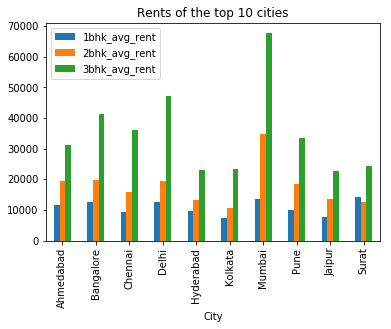

In [69]:
ax=df_top10.plot.bar(x="City",y=["1bhk_avg_rent","2bhk_avg_rent","3bhk_avg_rent"],rot=90)
ax.set_title("Rents of the top 10 cities")

## **Please note that the rent is in "rupees per month"**

In [72]:
# one hot encoding
nearby_venues_delhi_onehot = pd.get_dummies(nearby_venues_delhi[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nearby_venues_delhi_onehot['name'] = nearby_venues_delhi['name'] 

# move neighborhood column to the first column
fixed_columns = [nearby_venues_delhi_onehot.columns[-1]] + list(nearby_venues_delhi_onehot.columns[:-1])
nearby_venues_delhi_onehot = nearby_venues_delhi_onehot[fixed_columns]

nearby_venues_delhi_onehot.head()

,name,Coffee Shop,Dessert Shop,Fast Food Restaurant,Food & Drink Shop,Hardware Store,Hostel,Hotel,Indian Restaurant,Light Rail Station,Market,Miscellaneous Shop,Motel,Paper / Office Supplies Store,Pizza Place,Restaurant,Smoke Shop,Snack Place,Train Station
0,Amritsari Lassi Wala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Kake Di Hatti | काके दी हट्टी,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,bloomrooms @ New Delhi Railway Station,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Spice Market,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Giani's Di Hatti Rabri Faluda,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
nearby_venues_delhi_onehot.shape

(30, 19)

# One hot encoding

In [74]:
nearby_venues_delhi_grouped = nearby_venues_delhi_onehot.groupby('name').mean().reset_index()
nearby_venues_delhi_grouped

,name,Coffee Shop,Dessert Shop,Fast Food Restaurant,Food & Drink Shop,Hardware Store,Hostel,Hotel,Indian Restaurant,Light Rail Station,Market,Miscellaneous Shop,Motel,Paper / Office Supplies Store,Pizza Place,Restaurant,Smoke Shop,Snack Place,Train Station
0,Amici Cafe,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Amritsari Lassi Wala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,BABA Hotel,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Babu Ram Paranthe Wale,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Chandni Chowk | चाँदनी चौक (Chandni Chowk),0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,Chawri Bazaar | चावड़ी बाजार,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Chawri Bazar | चावड़ी बाजार Metro Station,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,Giani Kulfi,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Giani's Di Hatti Rabri Faluda,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Hotel Elegance,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [75]:
nearby_venues_delhi_grouped.shape

(30, 19)

In [78]:
num_top_venues = 5

for name in nearby_venues_delhi_grouped['name']:
    print("----"+name+"----")
    temp = nearby_venues_delhi_grouped[nearby_venues_delhi_grouped['name'] == name].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amici Cafe----
          venue  freq
0   Pizza Place   1.0
1   Coffee Shop   0.0
2  Dessert Shop   0.0
3   Snack Place   0.0
4    Smoke Shop   0.0


----Amritsari Lassi Wala----
          venue  freq
0   Snack Place   1.0
1   Coffee Shop   0.0
2  Dessert Shop   0.0
3    Smoke Shop   0.0
4    Restaurant   0.0


----BABA Hotel----
                venue  freq
0               Hotel   1.0
1         Coffee Shop   0.0
2  Miscellaneous Shop   0.0
3         Snack Place   0.0
4          Smoke Shop   0.0


----Babu Ram Paranthe Wale----
                venue  freq
0   Indian Restaurant   1.0
1         Coffee Shop   0.0
2  Miscellaneous Shop   0.0
3         Snack Place   0.0
4          Smoke Shop   0.0


----Chandni Chowk | चाँदनी चौक (Chandni Chowk)----
          venue  freq
0        Market   1.0
1  Dessert Shop   0.0
2   Snack Place   0.0
3    Smoke Shop   0.0
4    Restaurant   0.0


----Chawri Bazaar | चावड़ी बाजार----
                venue  freq
0      Hardware Store   1.0
1         Coffee

In [79]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [81]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
name_venues_sorted = pd.DataFrame(columns=columns)
name_venues_sorted['name'] = nearby_venues_delhi_grouped['name']

for ind in np.arange(nearby_venues_delhi_grouped.shape[0]):
    name_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nearby_venues_delhi_grouped.iloc[ind, :], num_top_venues)

name_venues_sorted.head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amici Cafe,Pizza Place,Train Station,Indian Restaurant,Dessert Shop,Fast Food Restaurant,Food & Drink Shop,Hardware Store,Hostel,Hotel,Light Rail Station
1,Amritsari Lassi Wala,Snack Place,Train Station,Dessert Shop,Fast Food Restaurant,Food & Drink Shop,Hardware Store,Hostel,Hotel,Indian Restaurant,Light Rail Station
2,BABA Hotel,Hotel,Train Station,Snack Place,Dessert Shop,Fast Food Restaurant,Food & Drink Shop,Hardware Store,Hostel,Indian Restaurant,Light Rail Station
3,Babu Ram Paranthe Wale,Indian Restaurant,Train Station,Snack Place,Dessert Shop,Fast Food Restaurant,Food & Drink Shop,Hardware Store,Hostel,Hotel,Light Rail Station
4,Chandni Chowk | चाँदनी चौक (Chandni Chowk),Market,Train Station,Indian Restaurant,Dessert Shop,Fast Food Restaurant,Food & Drink Shop,Hardware Store,Hostel,Hotel,Light Rail Station


# Cluster Neighbourhoods

In [83]:
from sklearn.cluster import KMeans
kclusters = 5

nearby_venues_delhi_grouped_clustering = nearby_venues_delhi_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_venues_delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 1, 2, 0, 0, 3, 3, 4], dtype=int32)

In [88]:
name_venues_sorted.insert(0,  '',kmeans.labels_)

nearby_venues_delhi_merged = nearby_venues_delhi

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nearby_venues_delhi_merged = nearby_venues_delhi_merged.join(name_venues_sorted.set_index('name'), on='name')

nearby_venues_delhi_merged.head() # check the last columns!

,name,categories,lat,lng,,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amritsari Lassi Wala,Snack Place,28.657325,77.224138,0,0,Snack Place,Train Station,Dessert Shop,Fast Food Restaurant,Food & Drink Shop,Hardware Store,Hostel,Hotel,Indian Restaurant,Light Rail Station
1,Kake Di Hatti | काके दी हट्टी,Indian Restaurant,28.658050,77.223377,1,1,Indian Restaurant,Train Station,Snack Place,Dessert Shop,Fast Food Restaurant,Food & Drink Shop,Hardware Store,Hostel,Hotel,Light Rail Station
2,bloomrooms @ New Delhi Railway Station,Hotel,28.645537,77.217701,4,4,Hotel,Train Station,Snack Place,Dessert Shop,Fast Food Restaurant,Food & Drink Shop,Hardware Store,Hostel,Indian Restaurant,Light Rail Station
3,Spice Market,Food & Drink Shop,28.657287,77.222595,0,0,Food & Drink Shop,Train Station,Snack Place,Dessert Shop,Fast Food Restaurant,Hardware Store,Hostel,Hotel,Indian Restaurant,Light Rail Station
4,Giani's Di Hatti Rabri Faluda,Dessert Shop,28.657889,77.223296,3,3,Dessert Shop,Train Station,Snack Place,Fast Food Restaurant,Food & Drink Shop,Hardware Store,Hostel,Hotel,Indian Restaurant,Light Rail Station


In [90]:
address = 'Delhi,India'

geolocator = Nominatim(user_agent="capstone")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [93]:
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues_delhi_merged['lat'],nearby_venues_delhi_merged['lng'], nearby_venues_delhi_merged['name'], nearby_venues_delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Similarly, we can find clusters of all other cities and analyze them

### I have written the observations and conclusion of this projects in my report